**Toán - Vi phân**

Giải tích là bộ môn nghiên cứu về sự thay đổi liên tục. Có hai nhánh chính: *vi phân* nghiên cứu về tốc độ thay đổi của các hàm số, và *tích phân* nghiên cứu về diện tích dưới đường cong. Trong notebook này, chúng ta sẽ bàn về nhánh đầu tiên.

*Vi phân nằm ở cốt lõi của Học Sâu, do đó rất cần phải hiểu được đạo hàm và gradient là gì, cách mà chúng được sử dụng trong Học Sâu, và nắm được những hạn chế của chúng.*

**Ghi chú:** đoạn mã trong notebook này chỉ được dùng để tạo các hình vẽ và ảnh động. Bạn không cần phải đọc hiểu các đoạn mã (nhưng tôi đã cố viết mã dễ đọc, nếu bạn có hứng thú).

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/math_differential_calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/math_differential_calculus.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Hệ số góc của một đường thẳng

In [1]:
#@title
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

Hệ số góc của đường thẳng sau là bao nhiêu?

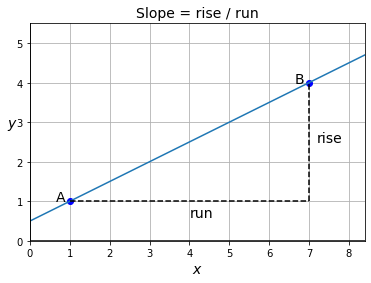

In [2]:
#@title
def get_AB_line(A_pos, B_pos, x_min=-1000, x_max=+1000):
    rise = B_pos[1] - A_pos[1]
    run = B_pos[0] - A_pos[0]
    slope = rise / run
    offset = A_pos[1] - slope * A_pos[0]
    return [x_min, x_max], [x_min * slope + offset, x_max * slope + offset]

def plot_AB_line(A_pos, B_pos, A_name="A", B_name="B"):
    for point, name in ((A_pos, A_name), (B_pos, B_name)):
        plt.plot(point[0], point[1], "bo")
        plt.text(point[0] - 0.35, point[1], name, fontsize=14)
    xs, ys = get_AB_line(A_pos, B_pos)
    plt.plot(xs, ys)

def plot_rise_over_run(A_pos, B_pos):
    plt.plot([A_pos[0], B_pos[0]], [A_pos[1], A_pos[1]], "k--")
    plt.text((A_pos[0] + B_pos[0]) / 2, A_pos[1] - 0.4, "run", fontsize=14)
    plt.plot([B_pos[0], B_pos[0]], [A_pos[1], B_pos[1]], "k--")
    plt.text(B_pos[0] + 0.2, (A_pos[1] + B_pos[1]) / 2, "rise", fontsize=14)

def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

A_pos = np.array([1, 1])
B_pos = np.array([7, 4])
plot_AB_line(A_pos, B_pos)
plot_rise_over_run(A_pos, B_pos)
show([0, 8.4, 0, 5.5], title="Slope = rise / run")

Có lẽ bạn đã biết rằng hệ số góc của một đường thẳng (không thẳng đứng) có thể được tính bằng cách chọn hai điểm bất kỳ $\mathrm{A}$ and $\mathrm{B}$ trên đường thẳng, và tính "phần tăng trên phần chạy" ("rise over run"):

$\text{hệ số góc} = \dfrac{\text{phần tăng}}{\text{phần chạy}} = \dfrac{\Delta y}{\Delta x} = \dfrac{y_\mathrm{B} - y_\mathrm{A}}{x_\mathrm{B} - x_\mathrm{A}}$


Trong ví dụ này, phần tăng là 3, và phần chạy là 6, nên hệ số góc là 3/6 = 0.5.

# Định nghĩa hệ số góc của một đường cong

Nhưng nếu ta muốn biết hệ số góc của một đường khác không phải đường thẳng thì sao? Ví dụ, hãy xem xét đường cong $y = f(x) = x^2$:

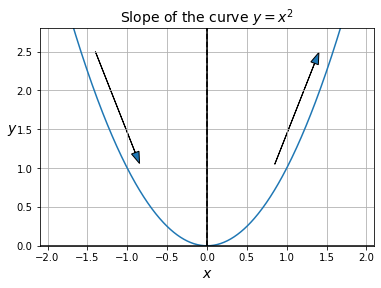

In [3]:
#@title
xs = np.linspace(-2.1, 2.1, 500)
ys = xs**2
plt.plot(xs, ys)

plt.plot([0, 0], [0, 3], "k--")
plt.arrow(-1.4, 2.5, 0.5, -1.3, head_width=0.1)
plt.arrow(0.85, 1.05, 0.5, 1.3, head_width=0.1)
show([-2.1, 2.1, 0, 2.8], title="Slope of the curve $y = x^2$")

Rõ ràng là hệ số góc thay đổi: ở bên trái (tức khi $x<0$), hệ số góc âm (tức khi nhìn từ trái sang phải thì đường cong sẽ đi xuống), còn ở bên phải (tức khi $x>0$) thì hệ số góc dương (tức khi nhìn từ trái sang phải thì đường cong sẽ đi lên). Tại $x=0$, hệ số góc bằng 0 (tức đường cong phẳng tại cục bộ). Việc hệ số góc bằng 0 tại giá trị nhỏ nhất (hoặc lớn nhất) là điều hết sức quan trọng, và ta sẽ quay lại điều này ở phần sau.

Làm thế nào để suy ra các con số từ những quan sát trên? Giả sử ta muốn ước lượng hệ số góc của đường cong tại điểm $\mathrm{A}$. Ta có thể lấy một điểm $\mathrm{B}$ khác trên đường cong nằm không xa lắm, rồi tính hệ số góc giữa hai điểm này:


In [4]:
#@title
def animate_AB_line(f, fp, f_str, x_A, axis=None):
    y_A = f(x_A)
    eps = 1e-4
    x_B_range = 1.5
    x_B = x_A + eps

    n_frames = 200
    text_offset_A = -0.2
    text_offset_B = +0.1
    x_min, x_max = -1000, 1000

    fig, ax = plt.subplots()

    # plot f(x)
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax.plot(xs, ys)

    # plot the tangent to the curve at point A
    if fp:
        slope = fp(x_A)
        offset = y_A - slope * x_A
        ax.plot([x_min, x_max], [slope*x_min + offset, slope*x_max + offset],
                "y--")

    # plot the line AB and the labels A and B so they can be animated
    y_A = f(x_A)
    y_B = f(x_B)
    xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
    line_inf, = ax.plot(xs, ys, "-")
    line_AB, = ax.plot([x_A, x_B], [y_A, y_B], "bo-")
    ax.text(x_A + text_offset_A, y_A, "A", fontsize=14)
    B_text = ax.text(x_B + text_offset_B, y_B, "B", fontsize=14)

    # plot the grid and axis labels
    title = r"Slope of the curve $y = {}$ at $x_\mathrm{{A}} = {}$".format(f_str, x_A)
    show(axis or [-2.1, 2.1, 0, 2.8], title=title)

    def update_graph(i):
        x_B = x_A + x_B_range * np.cos(i * 2 * np.pi / n_frames) ** 3
        if np.abs(x_B - x_A) < eps:
            x_B = x_A + eps # to avoid division by 0
        y_B = f(x_B)
        xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
        line_inf.set_data(xs, ys)
        line_AB.set_data([x_A, x_B], [y_A, y_B])
        B_text.set_position([x_B + text_offset_B, y_B])
        return line_inf, line_AB

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

animate_AB_line(lambda x: x**2, lambda x: 2*x, "x^2", -1)

Có thể thấy rằng khi điểm $\mathrm{B}$ nằm rất gần với điểm $\mathrm{A}$, đường thẳng $\mathrm{(AB)}$ gần như trùng với đường cong (ít nhất là ở khoảng cục bộ quanh điểm $\mathrm{A}$). Đường thẳng $\mathrm{(AB)}$ ngày càng gần hơn với đường **tiếp tuyến** của đường cong tại điểm $\mathrm{A}$: đây là ước lượng tuyến tính tốt nhất của đường cong tại điểm $\mathrm{A}$.

Vì vậy, ta có thể định nghĩa hệ số góc của đường cong tại điểm $\mathrm{A}$ là hệ số góc mà đường thẳng $\mathrm{(AB)}$ tiến tới khi $\mathrm{B}$ nằm rất gần với $\mathrm{A}$. Hệ số góc này có tên là **đạo hàm** của hàm $f$ tại $x=x_\mathrm{A}$. Ví dụ, đạo hàm của hàm  $f(x)=x^2$ tại $\mathrm{A}$ bằng $2x_\mathrm{A}$ (ta sẽ xem cách thu được kết quả này ngay sau đây). Vậy trong đồ thị ở trên, vì điểm $\mathrm{A}$ nằm tại $x_\mathrm{A}=-1$, đường tiếp tuyến của đường cong tại điểm đó có hệ số góc là $-2$.

# Tính Khả vi

Lưu ý rằng không phải hàm nào cũng như $x^2$: ví dụ, hãy xem xét hàm $f(x)=|x|$, giá trị tuyệt đối của $x$:

In [5]:
#@title
animate_AB_line(lambda x: np.abs(x), None, "|x|", 0)

Dù ta phóng to gốc tọa độ lên bao nhiêu đi chăng nữa (điểm nằm tại $x=0, y=0$), đường cong sẽ luôn có hình chữ V. Hệ số góc là -1 với mọi $x<0$, và là +1 với mọi $x>0$, nhưng **tại $x=0$, hệ số góc không xác định**, vì ta không thể ước lượng đường cong $y=|x|$ một cách cục bộ quanh gốc tọa độ với một đường thẳng, dù ta phóng to vào điểm này lên bao nhiêu đi chăng nữa.

Hàm $f(x)=|x|$ được xem là **không khả vi** tại $x=0$: đạo hàm của nó không xác định tại $x=0$. Điều này có nghĩa là đường cong $y=|x|$ có hệ số góc không xác định tại điểm này. Tuy nhiên, hàm $f(x)=|x|$ vẫn **khả vi** tại mọi điểm còn lại.

Để một hàm $f(x)$ khả vi tại một điểm $x_\mathrm{A}$ nào đó, hệ số góc của đường thẳng $\mathrm{(AB)}$ phải tiến tới một giá trị hữu hạn duy nhất, khi $\mathrm{B}$ trở nên rất gần với $\mathrm{A}$.

Điều này bao hàm một vài ràng buộc:

* Đầu tiên, tất nhiên hàm này phải **xác định** tại $x_\mathrm{A}$. Một phản ví dụ là hàm $f(x)=\dfrac{1}{x}$. Hàm này không xác định tại $x_\mathrm{A}=0$, nên nó không khả vi tại điểm này.
* Hàm này cũng phải **liên tục** tại $x_\mathrm{A}$, nghĩa là khi $x_\mathrm{B}$ rất gần với $x_\mathrm{A}$, $f(x_\mathrm{B})$ cũng phải trở nên rất gần với $f(x_\mathrm{A})$. Một phản ví dụ là hàm $f(x)=\begin{cases}-1 \text{ nếu }x < 0\\+1 \text{ nếu }x \geq 0\end{cases}$. Hàm này không liên tục tại $x_\mathrm{A}=0$, mặc dù nó xác định tại điểm đó: thật vậy, khi ta tiến tới điểm này từ phía âm, giá trị hàm số không hề tiến rất gần tới $f(0)=+1$. Do đó, hàm này không liên tục tại điểm đó, và vì thế cũng không khả vi.
* Hàm này phải không có **điểm gãy** tại $x_\mathrm{A}$, tức hệ số góc mà đường thẳng $\mathrm{(AB)}$ tiến tới khi $\mathrm{B}$ tiến tới $\mathrm{A}$ phải bằng nhau bất kể $\mathrm{B}$ tiến từ phía bên trái hay từ phía bên phải. Ta đã thấy một phản ví dụ là $f(x)=|x|$. Hàm này xác định và liên tục tại $x_\mathrm{A}=0$, nhưng lại có điểm gãy cũng tại $x_\mathrm{A}=0$: hệ số góc của đường cong $y=|x|$ là -1 ở phía bên trái, và +1 ở phía bên phải.
* Đường cong $y=f(x)$ phải không nằm **thẳng đứng tại điểm $\mathrm{A}$**. Một phản ví dụ là $f(x)=\sqrt[3]{x}$, căn bậc ba của $x$: đường cong nằm thẳng đứng tại gốc tọa độ, nên hàm này không khả vị tại $x_\mathrm{A}=0$, như được biểu diễn trong ảnh động dưới đây:

In [6]:
#@title
animate_AB_line(lambda x: np.cbrt(x), None, r"\sqrt[3]{x}", 0,
                axis=[-2.1, 2.1, -1.4, 1.4])

Giờ hãy cùng xem xét cách vi phân một hàm số (tức tìm đạo hàm của hàm đó).

# Vi phân một hàm số

Phần thảo luận phía trên dẫn đến định nghĩa sau:

<hr />

**Đạo hàm** của một hàm số $f(x)$ tại $x = x_\mathrm{A}$ có ký hiệu là $f'(x_\mathrm{A})$, và nó được định nghĩa như sau:

$f'(x_\mathrm{A}) = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{f(x_\mathrm{B}) - f(x_\mathrm{A})}{x_\mathrm{B} - x_\mathrm{A}}$

<hr />

Đừng sợ, phương trình trên đơn giản hơn so với vẻ ngoài của nó. Bạn có thể nhận ra công thức _phần tăng trên phần chạy_ $\dfrac{y_\mathrm{B} - y_\mathrm{A}}{x_\mathrm{B} - x_\mathrm{A}}$ mà ta đã thảo luận ở trên. Đó chỉ là hệ số góc của đường thẳng $\mathrm{(AB)}$. Và ký hiệu $\underset{x_\mathrm{B} \to x_\mathrm{A}}\lim$ nghĩa là ta đang khiến $x_\mathrm{B}$ tiến rất gần tới $x_\mathrm{A}$. Vậy theo ngôn ngữ thông thường, $f'(x_\mathrm{A})$ là giá trị mà hệ số góc của đường thẳng $\mathrm{(AB)}$ tiến tới khi $\mathrm{B}$ tiến rất gần tới $\mathrm{A}$. Phương trình trên chỉ là cách hình thức để diễn đạt điều này.

## Ví dụ: tìm đạo hàm của $x^2$

Hãy xem xét một ví dụ cụ thể. Hãy xem liệu ta có thể xác định hệ số góc của đường cong $y=x^2$ không, tại một điểm $\mathrm{A}$ bất kỳ (hãy cố gắng hiểu từng dòng trong phương trình, tôi hứa là chúng không khó lắm đâu):

$$
\begin{align*}
f'(x_\mathrm{A}) \, & = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{f(x_\mathrm{B}) - f(x_\mathrm{A})}{x_\mathrm{B} - x_\mathrm{A}} \\
& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{{x_\mathrm{B}}^2 - {x_\mathrm{A}}^2}{x_\mathrm{B} - x_\mathrm{A}} \quad && \text{vì } f(x) = x^2\\
& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{(x_\mathrm{B} - x_\mathrm{A})(x_\mathrm{B} + x_\mathrm{A})}{x_\mathrm{B} - x_\mathrm{A}}\quad && \text{vì } {x_\mathrm{A}}^2 - {x_\mathrm{B}}^2 = (x_\mathrm{A}-x_\mathrm{B})(x_\mathrm{A}+x_\mathrm{B})\\
& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim(x_\mathrm{B} + x_\mathrm{A})\quad && \text{vì hai } (x_\mathrm{B} - x_\mathrm{A}) \text{ triệt tiêu lẫn nhau}\\
& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim x_\mathrm{B} \, + \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim x_\mathrm{A}\quad && \text{vì giới hạn của tổng bằng tổng các giới hạn}\\
& = x_\mathrm{A} \, + \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim x_\mathrm{A} \quad && \text{vì } x_\mathrm{B}\text{ tiến tới } x_\mathrm{A} \\
& = x_\mathrm{A} + x_\mathrm{A} \quad && \text{vì } x_\mathrm{A} \text{ không đổi khi } x_\mathrm{B}\text{ tiến tới } x_\mathrm{A} \\
& = 2 x_\mathrm{A}
\end{align*}
$$

Thế là xong! Ta vừa chứng minh rằng hệ số góc của $y=x^2$ tại một điểm $\mathrm{A}$ bất kỳ là $f'(x_\mathrm{A}) = 2x_\mathrm{A}$. Việc mà ta vừa làm là được gọi là **vi phân**: tìm đạo hàm của một hàm số.

Hãy để ý rằng ta vừa sử dụng một vài tính chất quan trọng của giới hạn. Sau đây là một vài tính chất chính cần biết để làm việc với đạo hàm:

* $\underset{x \to k}\lim c = c \quad$ nếu $c$ là một giá trị không đổi nào đó không phụ thuộc vào $x$, thì giới hạn chỉ là $c$.
* $\underset{x \to k}\lim x = k \quad$ nếu $x$ tiến tới giá trị $k$ nào đó, thì giới hạn là $k$.
* $\underset{x \to k}\lim\,\left[f(x) + g(x)\right] = \underset{x \to k}\lim f(x) + \underset{x \to k}\lim g(x) \quad$ giới hạn của một tổng bằng tổng các giới hạn
* $\underset{x \to k}\lim\,\left[f(x) \times g(x)\right] = \underset{x \to k}\lim f(x) \times \underset{x \to k}\lim g(x) \quad$ giới hạn của một tích bằng tích các giới hạn


**Ghi chú quan trọng:** trong Học Sâu, vi phân gần như luôn được thực hiện tự động bằng nền tảng mà bạn đang sử dụng (như TensorFlow hoặc PyTorch). Cơ chế này được gọi là auto-diff, và tôi đã viết [một notebook khác](https://github.com/ageron/handson-ml2/blob/master/extra_autodiff.ipynb) về chủ đề này. Tuy nhiên, bạn vẫn nên đảm bảo rằng bạn đã hiểu rõ về đạo hàm, nếu không sau này bạn sẽ vất vả khi gặp lại chúng, ví dụ như khi bạn dùng căn bậc hai trong hàm chi phí nhưng lại không nhận ra rằng đạo hàm của phép toán này tiến tới vô tận khi $x$ tiến tới 0 (mẹo: bạn nên sử dụng $\sqrt{x+\epsilon}$, trong đó $\epsilon$ là một hằng số nhỏ nào đó, ví dụ như $10^{-4}$).

Thông thường, bạn sẽ gặp một định nghĩa hơi khác (nhưng tương đương) của đạo hàm. Hãy suy ra định nghĩa này từ định nghĩa phía trên. Đầu tiên, đặt $\epsilon = x_\mathrm{B} - x_\mathrm{A}$. Sau đó, hãy để ý rằng $\epsilon$ sẽ tiến tới 0 khi $x_\mathrm{B}$ tiến tới $x_\mathrm{A}$. Cuối cùng, lưu ý rằng $x_\mathrm{B} = x_\mathrm{A} + \epsilon$. Như vậy, ta có thể chuyển đổi định nghĩa phía trên như sau:

$f'(x_\mathrm{A}) = \underset{\epsilon \to 0}\lim\dfrac{f(x_\mathrm{A} + \epsilon) - f(x_\mathrm{A})}{\epsilon}$

Tiện thể thì hãy đổi tên $x_\mathrm{A}$ thành $x$, để loại bỏ chỉ số dưới A và giúp cho phương trình dễ đọc hơn:

<hr />

$f'(x) = \underset{\epsilon \to 0}\lim\dfrac{f(x + \epsilon) - f(x)}{\epsilon}$

<hr />

Được rồi! Giờ hãy dùng định nghĩa mới này để tính đạo hàm của $f(x)= x^2$ tại điểm $x$ bất kỳ, và (mong rằng) ta sẽ thu được kết quả tương tự như trên (ngoại trừ việc bây giờ ta sẽ dùng $x$ thay vì $x_\mathrm{A}$):

$$
\begin{align*}
f'(x) \, & = \underset{\epsilon \to 0}\lim\dfrac{f(x + \epsilon) - f(x)}{\epsilon} \\
& = \underset{\epsilon \to 0}\lim\dfrac{(x + \epsilon)^2 - {x}^2}{\epsilon} \quad && \text{vì } f(x) = x^2\\
& = \underset{\epsilon \to 0}\lim\dfrac{{x}^2 + 2x\epsilon + \epsilon^2 - {x}^2}{\epsilon}\quad && \text{vì } (x + \epsilon)^2 = {x}^2 + 2x\epsilon + \epsilon^2\\
& = \underset{\epsilon \to 0}\lim\dfrac{2x\epsilon + \epsilon^2}{\epsilon}\quad && \text{hai } {x}^2 \text{ triệt tiêu lẫn nhau}\\
& = \underset{\epsilon \to 0}\lim \, (2x + \epsilon)\quad && \text{vì } 2x\epsilon \text{ và } \epsilon^2 \text{ đều chia hết cho } \epsilon\\
& = 2 x
\end{align*}
$$

Vậy là mọi thứ đều hợp lý.

## Ký hiệu

Nói qua về ký hiệu: có một vài cách ký hiệu khác nhau cho đạo hàm mà bạn sẽ thấy trong các tài liệu:

$f'(x) = \dfrac{\mathrm{d}f(x)}{\mathrm{d}x} = \dfrac{\mathrm{d}}{\mathrm{d}x}f(x)$

Cách ký hiệu này cũng khá tiện khi hàm số không được đặt tên. Ví dụ $\dfrac{\mathrm{d}}{\mathrm{d}x}[x^2]$ ám chỉ đạo hàm của hàm số $x \mapsto x^2$.

Hơn nữa, khi mọi người nhắc đến hàm số $f(x)$, thi thoảng họ sẽ bỏ qua "$(x)$", và chỉ nói về hàm $f$. Trong trường hợp này, ký hiệu đạo hàm cũng trở nên đơn giản hơn:

$f' = \dfrac{\mathrm{d}f}{\mathrm{d}x} = \dfrac{\mathrm{d}}{\mathrm{d}x}f$

Ký hiệu $f'$ là cách ký hiệu Lagrange, còn $\dfrac{\mathrm{d}f}{\mathrm{d}x}$ cách ký hiệu Leibniz.

Cũng có một vài cách ký hiệu khác ít phổ biến hơn, ví dụ như cách ký hiệu Newton $\dot y$ (giả sử $y = f(x)$) hay cách ký hiệu Euler $\mathrm{D}f$.

## Vẽ tiếp tuyến của đường cong

Hãy dùng phương trình $f'(x) = 2x$ để vẽ tiếp tuyến của đường cong $y=x^2$ tại các điểm $x$ khác nhau (bạn có thể nhấn vào nút play dưới các đồ thị để chạy ảnh động):

In [7]:
#@title
def animate_tangent(f, fp, f_str):
    n_frames = 200
    x_min, x_max = -1000, 1000

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

    # plot f
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax1.plot(xs, ys)

    # plot tangent
    line_tangent, = ax1.plot([x_min, x_max], [0, 0])

    # plot f'
    xs = np.linspace(-2.1, 2.1, 500)
    ys = fp(xs)
    ax2.plot(xs, ys, "r-")

    # plot points A
    point_A1, = ax1.plot(0, 0, "bo")
    point_A2, = ax2.plot(0, 0, "bo")

    show([-2.1, 2.1, 0, 2.8], ax=ax1, ylabel="$f(x)$",
        title=r"$y=f(x)=" + f_str + "$ and the tangent at $x=x_\mathrm{A}$")
    show([-2.1, 2.1, -4.2, 4.2], ax=ax2, ylabel="$f'(x)$",
        title=r"y=f'(x) and the slope of the tangent at $x=x_\mathrm{A}$")

    def update_graph(i):
        x = 1.5 * np.sin(2 * np.pi * i / n_frames)
        f_x = f(x)
        df_dx = fp(x)
        offset = f_x - df_dx * x
        line_tangent.set_data([x_min, x_max],
                              [df_dx * x_min + offset, df_dx * x_max + offset])
        point_A1.set_data(x, f_x)
        point_A2.set_data(x, df_dx)
        return line_tangent, point_A1, point_A2

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

def f(x):
  return x**2

def fp(x):
  return 2*x

animate_tangent(f, fp, "x^2")

<hr />

**Ghi chú:** xem xét tiếp tuyến của đường cong $y=f(x)$ tại điểm $\mathrm{A}$ nào đó. Phương trình của nó là gì? Vì tiếp tuyến là một đường thẳng, phương trình của nó phải có dạng:

$y = \alpha x + \beta$

trong đó $\alpha$ là hệ số góc, và $\beta$ là tung độ gốc (tức tọa độ $y$ của giao điểm của đường thẳng và trục tung). Ta đã biết rằng hệ số góc của tiếp tuyến tại điểm $\mathrm{A}$ là đạo hàm của $f(x)$ tại điểm đó, vì vậy:

$\alpha = f'(x_\mathrm{A})$

Nhưng còn tung độ gốc $\beta$ thì sao? Ta cũng biết tiếp tuyến cắt đường cong tại điểm $\mathrm{A}$, nên ta biết $\alpha x_\mathrm{A} + \beta = f(x_\mathrm{A})$. Vì vậy:

$\beta = f(x_\mathrm{A}) - f'(x_\mathrm{A})x_\mathrm{A}$

Vậy ta có phương trình sau cho đường tiếp tuyến:

$y = f(x_\mathrm{A}) + f'(x_\mathrm{A})(x - x_\mathrm{A})$

Ví dụ, tiếp tuyến của đường cong $y=x^2$ được định nghĩa bởi phương trình:

$y = {x_\mathrm{A}}^2 + 2x_\mathrm{A}(x - x_\mathrm{A}) = 2x_\mathrm{A}x - x_\mathrm{A}^2$
<hr />

# Quy tắc vi phân

Một quy tắc rất quan trọng là **đạo hàm của một tổng bằng tổng các đạo hàm**. Cụ thể hơn, nếu ta định nghĩa $f(x) = g(x) + h(x)$, thì $f'(x) = g'(x) + h'(x)$. Quy tắc này khá dễ chứng minh:

$$
\begin{align*}
f'(x) & = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{theo định nghĩa}\\
& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon) + h(x+\epsilon) - g(x) - h(x)}{\epsilon} && \quad \text{dùng }f(x) = g(x) + h(x) \\
& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon) - g(x) + h(x+\epsilon) - h(x)}{\epsilon} && \quad \text{chỉ di chuyển các số hạng}\\
& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon) - g(x)}{\epsilon} + \underset{\epsilon \to 0}\lim\dfrac{h(x+\epsilon) - h(x)}{\epsilon} && \quad \text{vì giới hạn của một tổng bằng tổng các giới hạn}\\
& = g'(x) + h'(x) && \quad \text{sử dụng định nghĩa của }g'(x) \text{ và } h'(x)
\end{align*}
$$

Tương tự, ta có thể chứng minh các quy tắc quan trọng sau (phần chứng minh nằm ở cuối notebook này, nếu bạn có hứng thú):

|                  | Hàm $f$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Đạo hàm $f'$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |
| ---------------- |------------------- | ------------------------------- |
| **Hằng số**     | $f(x) = c$         | $f'(x) = 0$                     |
| **Tổng**          | $f(x) = g(x) + h(x)$ | $f'(x) = g'(x) + h'(x)$       |
| **Tích**      | $f(x) = g(x) h(x)$ | $f'(x) = g(x)h'(x) + g'(x)h(x)$ |
| **Thương**     | $f(x) = \dfrac{g(x)}{h(x)}$ | $f'(x) = \dfrac{g'(x)h(x) - g(x)h'(x)}{h^2(x)}$ |
| **Lũy thừa**        | $f(x) = x^r$ with $r \neq 0$ | $f'(x) = rx^{r-1}$    |
| **Mũ**  | $f(x) = \exp(x)$   | $f'(x)=\exp(x)$                 |
| **Logarit**    | $f(x) = \ln(x)$    | $f'(x) = \dfrac{1}{x} $         |
| **Sin**          | $f(x) = \sin(x)$   | $f'(x) = \cos(x) $              |
| **Cos**          | $f(x) = \cos(x)$   | $f'(x) = -\sin(x) $             |
| **Tan**          | $f(x) = \tan(x)$   | $f'(x) = \dfrac{1}{\cos^2(x)}$  |
| **Quy tắc Dây chuyền**   | $f(x) = g(h(x))$ | $f'(x) = g'(h(x))\,h'(x)$  |


---

Hãy thử vi phân một hàm đơn giản bằng các quy tắc trên: ta sẽ tìm đạo hàm của $f(x)=x^3+\cos(x)$. Sử dụng quy tắc đạo hàm của tổng, ta tính được $f'(x)=\dfrac{\mathrm{d}}{\mathrm{d}x}[x^3] + \dfrac{\mathrm{d}}{\mathrm{d}x}[\cos(x)]$. Sử dụng quy tắc đạo hàm cho lũy thừa và cho hàm $\cos$, ta tính được $f'(x) = 3x^2 - \sin(x)$.

---

Hãy thử một ví dụ khó hơn: tìm đạo hàm của $f(x) = \sin(2 x^2) + 1$. Đầu tiên ta đặt $u(x)=\sin(x) + 1$ và $v(x) = 2x^2$. Sử dụng quy tắc cho tổng, ta tính được $u'(x)=\dfrac{\mathrm{d}}{\mathrm{d}x}[sin(x)] + \dfrac{\mathrm{d}}{\mathrm{d}x}[1]$. Vì đạo hàm của hàm $\sin$ là $\cos$, và đạo hàm của hằng số là 0, ta tính được $u'(x)=\cos(x)$. Tiếp theo, sử dụng quy tắc tích, ta tính được $v'(x)=2\dfrac{\mathrm{d}}{\mathrm{d}x}[x^2] + \dfrac{\mathrm{d}}{\mathrm{d}x}[2]\,x^2$. Vì đạo hàm của một hằng số bằng 0, số hạng thứ hai sẽ bị triệt tiêu. Và vì quy tắc lũy thừa nói rằng đạo hàm của $x^2$ là $2x$, ta tính được $v'(x)=4x$. Cuối cùng, sử dụng quy tắc dây chuyền, vì $f(x)=u(v(x))$, ta tính được $f'(x)=u'(v(x))\,v'(x)=\cos(2x^2)\,4x$.

Hãy vẽ đồ thị của hàm $f$ và $f'$, và sử dụng $f'(x_\mathbf{A})$ để tìm hệ số góc của tiếp tuyến tại một điểm $\mathbf{A}$ nào đó:


In [8]:
#@title
animate_tangent(lambda x: np.sin(2*x**2) + 1, lambda x: 4*x*np.cos(2*x**2), r"\sin(2x^2)+1")

## Quy tắc dây chuyền

Quy tắc dây chuyền trở nên dễ nhớ hơn nếu dùng cách ký hiệu Leibniz:

Nếu $f(x)=g(h(x))$ và $y=h(x)$, thì: $\dfrac{\mathrm{d}f}{\mathrm{d}x} = \dfrac{\mathrm{d}f}{\mathrm{d}y} \dfrac{\mathrm{d}y}{\mathrm{d}x}$

Thật vậy, $\dfrac{\mathrm{d}f}{\mathrm{d}y} = f'(y) = f'(h(x))$ and $\dfrac{\mathrm{d}y}{\mathrm{d}x}=h'(x)$.

Ta có thể móc nối nhiều hàm với nhau. Ví dụ, nếu $f(x)=g(h(i(x)))$, và ta định nghĩa $y=i(x)$ và $z=h(y)$, thì $\dfrac{\mathrm{d}f}{\mathrm{d}x} = \dfrac{\mathrm{d}f}{\mathrm{d}z} \dfrac{\mathrm{d}z}{\mathrm{d}y} \dfrac{\mathrm{d}y}{\mathrm{d}x}$. Sử dụng cách ký hiệu Lagrange, ta thu được $f'(x)=g'(z)\,h'(y)\,i'(x)=g'(h(i(x)))\,h'(i(x))\,i'(x)$

Quy tắc dây chuyền rất quan trọng trong học sâu, bởi về cơ bản một mạng nơ-ron là một chuỗi các hàm hợp lại. Ví dụ, một mạng nơ-ron dày đặc 3 tầng tương ứng với hàm sau: $f(\mathbf{x})=\operatorname{Dense}_3(\operatorname{Dense}_2(\operatorname{Dense}_1(\mathbf{x})))$ (trong ví dụ này, $\operatorname{Dense}_3$ là tầng đầu ra).


# Đạo hàm và Tối ưu

Khi tối ưu một hàm $f(x)$, ta sẽ tìm các giá trị $x$ để cực tiểu hóa (hoặc cực đại hóa) hàm này.

Một lưu ý quan trọng là khi một hàm đạt giá trị nhỏ nhất hay lớn nhất, và giả sử nó khả vi tại điểm đó, đạo hàm sẽ chắc chắn bằng 0. Ví dụ, bạn có thể xem ảnh động phía trên, và để ý rằng bất cứ khi nào hàm $f$ (ở đồ thị phía trên) đạt giá trị lớn nhất hay nhỏ nhất, đạo hàm $f'$ (ở đồ thị phía dưới) sẽ bằng 0.

Do đó, một cách để tối ưu hóa một hàm số là tìm đạo hàm và giải bằng công thức để tìm tất cả các giá trị khiến cho đạo hàm bằng 0, sau đó kiểm tra xem giá trị nào khiến cho hàm được tối ưu (nếu có). Ví dụ, hãy xem xét hàm số $f(x)=\dfrac{1}{4}x^4 - x^2 + \dfrac{1}{2}$. Sử dụng các quy tắc đạo hàm (cụ thể là quy tắc tổng, quy tắc tích, quy tắc lũy thừa và quy tắc hằng số), ta thu được $f'(x)=x^3 - 2x$. Ta sẽ tìm các giá trị $x$ khiến $f'(x)=0$, tức $x^3-2x=0$, và do đó $x(x^2-2)=0$. Vậy $x=0$, $x=\sqrt2$ hoặc $x=-\sqrt2$. Như có thể thấy trong đồ thị sau của $f(x)$, ba giá trị này ứng với các cực trị. Hai cực tiểu toàn cục $f\left(\sqrt2\right)=f\left(-\sqrt2\right)=-\dfrac{1}{2}$ và một cực đại cục bộ $f(0)=\dfrac{1}{2}$.


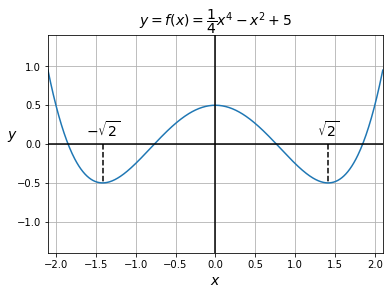

In [9]:
#@title
def f(x):
  return 1/4 * x**4 - x**2 + 1/2

xs = np.linspace(-2.1, 2.1, 500)
ys = f(xs)
plt.plot(xs, ys)
plt.plot([np.sqrt(2), np.sqrt(2)], [0, f(np.sqrt(2))], "k--")
plt.plot([-np.sqrt(2), -np.sqrt(2)], [0, f(-np.sqrt(2))], "k--")
plt.text(-np.sqrt(2), 0.1, r"$-\sqrt{2}$",
         fontsize=14, horizontalalignment="center")
plt.text(np.sqrt(2), 0.1, r"$\sqrt{2}$",
         fontsize=14, horizontalalignment="center")
show(axis=[-2.1, 2.1, -1.4, 1.4], title=r"$y=f(x)=\dfrac{1}{4}x^4 - x^2 + 5$")

Nếu một hàm có một cực trị tại điểm $x_\mathrm{A}$ và khả vi tại điểm đó, thì $f'(x_\mathrm{A})=0$. Tuy nhiên, điều ngược lại không phải lúc nào cũng đúng. Ví dụ, hãy xét hàm $f(x)=x^3$. Đạo hàm của nó là $f'(x)=x^2$, và bằng 0 tại $x_\mathrm{A}=0$. Dù vậy, điểm này vẫn _không phải_ là cực trị, như có thể thấy trong hình sau. Nó chỉ là một điểm mà tại đó hệ số góc bằng 0.

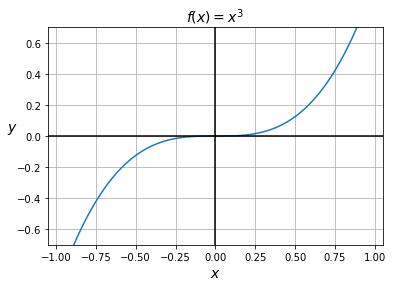

In [10]:
#@title
def f(x):
  return x**3

xs = np.linspace(-1.05, 1.05, 500)
ys = f(xs)
plt.plot(xs, ys)
show(axis=[-1.05, 1.05, -0.7, 0.7], title=r"$f(x)=x^3$")

Vậy ngắn gọn là ta có thể tối ưu một hàm bằng cách giải theo công thức đẻ tìm ra các điểm khiến cho đạo hàm bằng 0, sau đó xem xét từng điểm này. Đây là một phương pháp rất gọn, nhưng nó đòi hỏi nhiều công sức, và không phải lúc nào cũng dễ, hay thậm chí là khả thi. Với mạng nơ-ron, ta gần như không thể dùng phương pháp này.

Một phương án khác để tối ưu hàm số là sử dụng **Hạ Gradient** (ta sẽ xem xét việc cực tiểu hóa hàm số, nhưng các bước cũng gần như tương tự nếu ta muốn cực đại hóa hàm số): bắt đầu tại một điểm ngẫu nhiên $x_0$, sau đó dùng đạo hàm của hàm số để tính hệ số góc tại điểm này, rồi dịch chuyển xuống dưới một chút, lặp lại quy trình cho tới khi gặp được một cực tiểu cục bộ, và cầu mong rằng đây cũng chính là cực tiểu toàn cục.

Tại mỗi vòng lặp, bước dịch chuyển sẽ tỉ lệ với hệ số góc, do vậy quá trình này sẽ chậm lại một cách tự nhiên khi tới gần một cực tiểu cục bộ. Mỗi bước cũng tỉ lệ với tốc độ học: đây là một tham số của thuật toán Hạ Gradient (vì không phải tham số của hàm mà ta đang tối ưu hóa nên nó được gọi là **siêu tham số**).

Đây là một hoạt ảnh của quy trình này trên hàm số $f(x)=\dfrac{1}{4}x^4 - x^2 + \dfrac{1}{2}$:

In [11]:
#@title
def animate_gradient_descent(f, fp, f_str, x_0):
    learning_rate = 0.01
    n_frames = 200
    x_min, x_max = -1000, 1000

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

    # plot f
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax1.plot(xs, ys)

    # plot tangent
    line_tangent, = ax1.plot([x_min, x_max], [0, 0])

    # plot f'
    xs = np.linspace(-2.1, 2.1, 500)
    ys = fp(xs)
    ax2.plot(xs, ys, "r-")

    # plot points A
    point_A1, = ax1.plot(0, 0, "bo")
    point_A2, = ax2.plot(0, 0, "bo")

    show([-2.1, 2.1, -1.4, 1.4], ax=ax1, ylabel="$f(x)$",
        title=r"$y=f(x)=" + f_str + "$ and the tangent at $x=x_\mathrm{A}$")
    show([-2.1, 2.1, -4.2, 4.2], ax=ax2, ylabel="$f'(x)$",
        title=r"$y=f'(x)$ and the slope of the tangent at $x=x_\mathrm{A}$")

    xs = []
    x = x_0
    for index in range(n_frames):
      xs.append(x)
      slope = fp(x)
      x = x - slope * learning_rate

    def update_graph(i):
        x = xs[i]
        f_x = f(x)
        df_dx = fp(x)
        offset = f_x - df_dx * x
        line_tangent.set_data([x_min, x_max],
                              [df_dx * x_min + offset, df_dx * x_max + offset])
        point_A1.set_data(x, f_x)
        point_A2.set_data(x, df_dx)
        return line_tangent, point_A1, point_A2

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

def f(x):
  return 1/4 * x**4 - x**2 + 1/2

def fp(x):
  return x**3 - 2*x

animate_gradient_descent(f, fp, r"\dfrac{1}{4}x^4 - x^2 + \dfrac{1}{2}",
                         x_0=1/4)

Trong ví dụ này, ta bắt đầu với $x_0 = \dfrac{1}{4}$, nên Hạ Gradient "lăn xuống" theo hướng giá trị nhỏ nhất nằm tại $x = \sqrt2$. Nhưng nếu ta bắt đầu tại $x_0 = -\dfrac{1}{4}$, thuật toán sẽ tiến về hướng $-\sqrt2$. Điều này chứng tỏ rằng giá trị ban đầu khá quan trọng: dựa vào $x_0$, thuật toán có thể hội tụ về cực tiểu toàn cục (tuyệt!) hoặc về một cực tiểu cục bộ (không tốt!) hoặc mắc kẹt trên một vùng phẳng, ví dụ như một điểm uốn ngang (không tốt!).

Có khá nhiều biến thể của thuật toán Hạ Gradient, và chúng đã được thảo luận trong Chương 11 của cuốn sách. Đó là những thuật toán mà ta cần quan tâm trong Học Sâu. Chúng đều dựa trên đạo hàm của hàm chi phí theo tham số mô hình (ta sẽ thảo luận về hàm có nhiều tham số ở phần sau của notebook).

# Đạo hàm bậc cao

Chuyện gì sẽ xảy ra nếu ta vi phân cả hàm $f'(x)$? Ta sẽ thu được thứ được gọi là đạo hàm bậc hai, ký hiệu là $f''(x)$, hay $\dfrac{\mathrm{d}^2f}{\mathrm{d}x^2}$. Nếu ta lặp lại việc này bằng cách vi phân $f''(x)$, ta sẽ thu được đạo hàm bậc ba $f'''(x)$, hay $\dfrac{\mathrm{d}^3f}{\mathrm{d}x^3}$. Và ta có thể tiếp tục để thu được các đạo hàm bậc cao hơn.

Ý nghĩa của đạo hàm bậc hai là gì? Vì đạo hàm (bậc một) biểu diễn tốc độ thay đổi tức thời của $f$ tại mỗi điểm, đạo hàm bậc hai biểu diễn tốc độ thay đổi tức thời của chính tốc độ thay đổi, hay nói cách khác, bạn có thể xem nó như **gia tốc** của đường cong: nếu $f''(x) < 0$, đường cong đang tăng tốc "xuống dưới", nếu $f''(x) > 0$ thì đường cong đang tăng tốc "lên trên", và nếu $f''(x) = 0$, thì khu vực lân cận sẽ giống với đường thẳng. Lưu ý rằng đường cong có thể đang đi lên (tức $f'(x)>0$) nhưng cũng đồng thời có gia tốc hướng xuống dưới (tức $f''(x) < 0$): ví dụ, hãy hình dung quỹ đạo của một hòn đá được ném lên trời, và đang bị chậm dần do trọng lực (liên tục khiên cho gia tốc của hòn đá hướng xuống dưới).

Thường thì Học Sâu chỉ dùng đạo hàm bậc một, nhưng thi thoảng bạn sẽ bắt gặp một vài thuật toán tối ưu hoặc hàm chi phí được dựa trên đạo hàm bậc hai.

# Đạo hàm riêng

Cho tới giờ, ta mới chỉ xem xét các hàm có một biến duy nhất là $x$. Chuyện gì sẽ xảy ra khi có nhiều biến? Để ví dụ, hãy bắt đầu với một hàm đơn giản với 2 biến: $f(x,y)=\sin(xy)$. Nếu vẽ đồ thị cho hàm này, dùng $z=f(x,y)$, ta thu được đồ thị 3D sau. Tôi cũng đã vẽ một điểm $\mathrm{A}$ tùy ý trên bề mặt, cùng với hai đường thẳng mà tôi sẽ mô tả ngay sau đây.

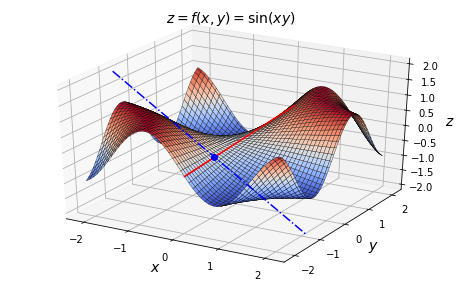

In [12]:
#@title
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(f, title):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')

    xs = np.linspace(-2.1, 2.1, 100)
    ys = np.linspace(-2.1, 2.1, 100)
    xs, ys = np.meshgrid(xs, ys)
    zs = f(xs, ys)

    surface = ax.plot_surface(xs, ys, zs,
                              cmap=mpl.cm.coolwarm,
                              linewidth=0.3, edgecolor='k')

    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$y$", fontsize=14)
    ax.set_zlabel("$z$", fontsize=14)
    ax.set_title(title, fontsize=14)
    return ax

def plot_tangents(ax, x_A, y_A, f, df_dx, df_dy):
    ax.plot3D([x_A], [y_A], f(x_A, y_A), "bo", zorder=10)
    x_min, x_max = -2.1, 2.1
    slope_x = df_dx(x_A, y_A)
    offset_x = f(x_A, y_A) - slope_x * x_A
    ax.plot3D([x_min, x_max], [y_A, y_A],
              [slope_x * x_min + offset_x, slope_x * x_max + offset_x], "b-.",
              zorder=5)
    y_min, y_max = -2.1, 2.1
    slope_y = df_dy(x_A, y_A)
    offset_y = f(x_A, y_A) - slope_y * y_A
    ax.plot3D([x_A, x_A], [y_min, y_max],
              [slope_y * y_min + offset_y, slope_y * y_max + offset_y], "r-",
              zorder=5)

def f(x, y):
    return np.sin(x * y)

def df_dx(x, y):
    return y * np.cos(x * y)

def df_dy(x, y):
    return x * np.cos(x * y)

ax = plot_3d(f, r"$z = f(x, y) = \sin(xy)$")
plot_tangents(ax, 0.1, -1, f, df_dx, df_dy)

plt.show()

Hãy tưởng tượng bạn đang đứng trên bề mặt này tại điểm $\mathrm{A}$ và đang đi dọc theo trục $x$ về phía bên phải ($x$ tăng), đường đi xuống dưới sẽ khá dốc (theo đường nét đứt màu xanh). Hệ số góc theo trục này sẽ có giá trị âm. Tuy nhiên, nếu bạn đi dọc theo trục $y$, hướng về đằng sau ($y$ tăng), thì đường đi sẽ gần như phẳng (theo đường nét liền màu đỏ), ít nhất là tại vùng lân cận: hệ số góc theo trục này, tại điểm $\mathrm{A}$, sẽ có giá trị hơi dương.

Như có thể thấy, một con số duy nhất không còn đủ để mô tả hệ số góc của hàm tại một điểm cho trước. Ta cần một hệ số góc cho trục $x$, và một hệ số góc cho trục $y$. Một hệ số góc cho mỗi biến. Để tìm hệ số góc theo trục $x$, được gọi là **đạo hàm riêng của $f$ theo $x$**, và có ký hiệu $\dfrac{\partial f}{\partial x}$ (với xoăn $\partial$), ta có thể vi phân $f(x,y)$ theo $x$ trong khi xem mọi biến còn lại (trong trường hợp này chỉ có $y$) như các hằng số:

$ \dfrac{\partial f}{\partial x} = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon, y) - f(x,y)}{\epsilon}$

Nếu dùng các quy tắc đạo hàm được liệt kê phía trên (trong ví dụ này ta chỉ cần quy tắc tích và quy tắc dây chuyền), và đảm bảo rằng $y$ được xem như hằng số, ta sẽ thu được:

$ \dfrac{\partial f}{\partial x} = y\cos(xy)$

Tương tự, đạo hàm riêng của $f$ theo $y$ được định nghĩa như sau:

$ \dfrac{\partial f}{\partial y} = \underset{\epsilon \to 0}\lim\dfrac{f(x, y+\epsilon) - f(x,y)}{\epsilon}$

Tất cả các biến ngoại trừ $y$ được xem như hằng số (chỉ có $x$ trong ví dụ này). Sử dụng các quy tắc đạo hàm, ta thu được:

$ \dfrac{\partial f}{\partial y} = x\cos(xy)$

Giờ ta đã có các phương trình để tính hệ số góc theo trục $x$ và theo trục $y$. Nhưng còn các hướng khác thì sao? Nếu ta đang đứng trên bề mặt tại điểm $\mathrm{A}$,  ta có thể đi về bất cứ hướng nào mà ta muốn, chứ không chỉ dọc theo trục $x$ hay trục $y$. Hệ số góc sẽ trông như thế nào? Đúng ra ta phải tính hệ số góc theo mọi hướng chứ?

Thực ra ta có thể chứng minh rằng nếu tất cả các đạo hàm riêng đều xác định và liên tục trong một vùng lân cận quanh điểm $\mathrm{A}$, thì hàm $f$ sẽ **hoàn toàn khả vi** tại điểm đó, tức nó có thể được xấp xỉ cục bộ bởi một mặt phẳng $P_\mathrm{A}$ (mặt phẳng tiếp tuyến của bề mặt tại điểm $\mathrm{A}$). Trong trường hợp này, chỉ cần hai đạo hàm riêng theo mỗi trục (ở đây là $x$ và $y$) là đủ để mô tả mặt phẳng đó. Phương trình của nó là:

$z = f(x_\mathrm{A},y_\mathrm{A}) + (x - x_\mathrm{A})\dfrac{\partial f}{\partial x}(x_\mathrm{A},y_\mathrm{A}) + (y - y_\mathrm{A})\dfrac{\partial f}{\partial y}(x_\mathrm{A},y_\mathrm{A})$

Trong Học Sâu, thường ta sẽ làm việc với các hàm khả vi hoàn toàn tại mọi điểm mà ở đó các đạo hàm riêng xác định, nhưng bạn nên biết rằng không phải hàm nào cũng đẹp như vậy. Ví dụ, hãy xem xét hàm sau:

$h(x,y)=\begin{cases}0 \text { if } x=0 \text{ or } y=0\\1 \text { cách khác }\end{cases}$

Tại gốc tọa độ (tức $(x,y)=(0,0)$), đạo hàm riêng của hàm $h$ theo $x$ và $y$ đều xác định: chúng đều bằng 0. Nhưng rõ ràng hàm này được xấp xỉ bằng một mặt phẳng tại điểm đó. Nó không khả vi hoàn toàn tại điểm này (nhưng vẫn khả vi hoàn toàn tại bất cứ điểm nào không nằm trên các trục).


# Gradient

Cho tới giờ ta mới chỉ xem xét các hàm với một biến $x$, hoặc với 2 biến $x$ và $y$, nhưng những gì được viết ở trên cũng áp dụng cho các hàm với nhiều biến hơn. Vì vậy hãy xét hàm $f$ với $n$ biến: $f(x_1, x_2, \dots, x_n)$. Để tiện hơn, ta sẽ định nghĩa một vector $\mathbf{x}$ với phần tử là các biến này:

$\mathbf{x}=\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}$ 

Now $f(\mathbf{x})$ is easier to write than $f(x_1, x_2, \dots, x_n)$.

The gradient of the function $f(\mathbf{x})$ at some point $\mathbf{x}_\mathrm{A}$ is the vector whose components are all the partial derivatives of the function at that point. It is noted $\nabla f(\mathbf{x}_\mathrm{A})$, or sometimes $\nabla_{\mathbf{x}_\mathrm{A}}f$:

$\nabla f(\mathbf{x}_\mathrm{A}) = \begin{pmatrix}
\dfrac{\partial f}{\partial x_1}(\mathbf{x}_\mathrm{A})\\
\dfrac{\partial f}{\partial x_2}(\mathbf{x}_\mathrm{A})\\
\vdots\\\
\dfrac{\partial f}{\partial x_n}(\mathbf{x}_\mathrm{A})\\
\end{pmatrix}$

Giả định rằng hàm này khả vi hoàn toàn tại điểm $\mathbf{x}_\mathbf{A}$, thì bề mặt mà nó mô tả có thể được xấp xỉ bằng một mặt phẳng tại điểm đó (như đã thảo luận ở phần trước), và vector gradient là vector chỉ về hướng dốc nhất trên mặt phẳng đó.

## Lại nói về Hạ Gradient

Trong Học Sâu, thuật toán Hạ Gradient mà ta thảo luận trước đó sẽ dựa trên gradient thay vì đạo hàm (lý giải cho cái tên của nó). Thuật toán này hoạt động gần như tương tự, nhưng nó làm việc với vector thay vì các giá trị vô hướng: bắt đầu với một vector ngẫu nhiên $\mathbf{x}_0$, rồi tính gradient của $f$ tại điểm đó, đi một bước nhỏ theo hướng ngược lại, và lặp lại cho tới khi hội tụ. Cụ thể hơn, tại mỗi bước $t$, ta tính $\mathbf{x}_t = \mathbf{x}_{t-1} - \eta \nabla f(\mathbf{x}_{t-1})$. Hằng số $\eta$ là tốc độ học, thường là một giá trị nhỏ như $10^{-3}$. Trong thực tế, ta thường dùng các biến thể hiệu quả hơn của thuật toán này, nhưng ý tưởng chung thì vẫn không đổi.

Trong Học Sâu, chữ cái $\mathbf{x}$ thường được dùng để biểu diễn dữ liệu đầu vào. Khi ta _sử dụng_ một mạng nơ-ron để đưa ra dự đoán, ta sẽ đưa đầu vào $\mathbf{x}$ vào mạng nơ-ron, và rồi thu được dự đoán $\hat{y} = f(\mathbf{x})$. Hàm $f$ xem các tham số mô hình là hằng số. Ta có thể dùng ký hiệu rõ ràng hơn như $\hat{y} = f_\mathbf{w}(\mathbf{x})$, trong đó $\mathbf{w}$ biểu diễn các tham số mô hình và ám chỉ rằng hàm này dựa vào các tham số đó, nhưng lại xem chúng như hằng số.

Tuy nhiên, khi _huấn luyện_ một mạng nơ-ron, ta lại làm việc hoàn toàn ngược lại: mọi mẫu huấn luyện được nhóm vào một ma trận $\mathbf{X}$, mọi nhãn được nhóm vào một vector $\mathbf{y}$, và cả $\mathbf{X}$ lẫn $\mathbf{y}$ đều được xem như hằng số, trong khi $\mathbf{w}$ được xem như biến: cụ thể, ta đang cố gắng cực tiểu hóa hàm chi phí $\mathcal L_{\mathbf{X}, \mathbf{y}}(\mathbf{w}) = g(f_{\mathbf{X}}(\mathbf{w}), \mathbf{y})$, trong đó $g$ là một hàm đo sự "chênh lệch" giữa các dự đoán $f_{\mathbf{X}}(\mathbf{w})$ và các nhãn $\mathbf{y}$, trong đó $f_{\mathbf{X}}(\mathbf{w})$ biểu diễn vector chứa các dự đoán ứng với mỗi mẫu huấn luyện. Việc cực tiểu hóa hàm mất mát thường được thực hiện bằng Hạ Gradient (hoặc một biến thể của nó): ta bắt đầu với các tham số mô hình ngẫu nhiên $\mathbf{w}_0$, sau đó tính $\nabla \mathcal L(\mathbf{w}_0)$ và dùng vector gradient này để thực hiện một bước Hạ Gradient, rồi lặp lại quá trình này cho tới khi hội tụ. Một điều rất quan trọng cần phải hiểu là gradient của hàm mất mát được tính theo tham số mô hình $\mathbf{w}$ (chứ _không phải_ đầu vào $\mathbf{x}$).

# Jacobian

Cho tới giờ ta mới chỉ xem xét các hàm có đầu ra là một giá trị vô hướng, nhưng đầu ra cũng có thể là vector. Ví dụ, một mạng nơ-ron phân loại thường xuất ra một xác suất cho mỗi lớp, do đó nếu có $m$ lớp, mạng nơ-ron sẽ xuất ra một vector $d$ chiều cho mỗi đầu vào.

Trong Học Sâu, thường ta chỉ cần vi phân hàm mất mát, và hàm này gần như luôn có đầu ra là một giá trị vô hướng duy nhất. Nhưng giả sử ta muốn vi phân một hàm $\mathbf{f}(\mathbf{x})$ có đầu ra là các vector $d$ chiều. Tin tốt là ta chỉ cần xem các chiều _đầu ra_ một cách độc lập lẫn nhau. Nếu làm vậy, ta sẽ thu được một đạo hàm riêng cho mỗi chiều đầu vào và mỗi chiều đầu ra. Nếu ta đưa chúng vào một ma trận duy nhất, với một cột cho mỗi chiều đầu vào và một cột cho mỗi chiều đầu ra, ta sẽ thu được **ma trận Jacobian**.

$
\mathbf{J}_\mathbf{f}(\mathbf{x}_\mathbf{A}) = \begin{pmatrix}
\dfrac{\partial f_1}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_1}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_1}{\partial x_n}(\mathbf{x}_\mathbf{A})\\
\dfrac{\partial f_2}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_2}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_2}{\partial x_n}(\mathbf{x}_\mathbf{A})\\
\vdots && \vdots && \ddots && \vdots \\
\dfrac{\partial f_m}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_m}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_m}{\partial x_n}(\mathbf{x}_\mathbf{A})
\end{pmatrix}
$

Các đạo hàm riêng thường được gọi là các **Jacobian**. Đây chỉ là các đạo hàm riêng bậc nhất của hàm $\mathbf{f}$.

# Hessian

Hãy quay lại với hàm $f(\mathbf{x})$ có đầu vào là một vector $n$ chiều và đầu ra là một giá trị vô hướng. Nếu ta tìm phương trình đạo hàm riêng của $f$ theo $x_i$ (phần tử thứ $i$ của $\mathbf{x}$), ta sẽ thu được một hàm mới $\mathbf{x}$: $\dfrac{\partial f}{\partial x_i}$. Giờ ta có thể tính đạo hàm riêng của hàm này theo $x_j$ (phần tử thứ $j$ của $\mathbf{x}$). Kết quả là đạo hàm riêng của đạo hàm riêng: nói cách khác, đây là các **đạo hàm riêng bậc hai**, còn được gọi là **Hessian**. Nó được ký hiệu là $\mathbf{x}$: $\dfrac{\partial^2 f}{\partial x_jx_i}$. Nếu $i\neq j$ thì nó sẽ được gọi là **đạo hàm riêng bậc hai lẫn lộn**.
Còn nếu $j=i$, ký hiệu của nó là $\dfrac{\partial^2 f}{\partial {x_i}^2}$

Hãy xét một ví dụ: $f(x, y)=\sin(xy)$. Như đã được chứng minh phía trên, các đạo hàm riêng bậc nhất của $f$ là: $\dfrac{\partial f}{\partial x}=y\cos(xy)$ và $\dfrac{\partial f}{\partial y}=x\cos(xy)$. Vậy giờ ta có thể tính tất cả các Hessian (sử dụng các quy tắc đạo hàm mà ta đã thảo luận trước đó):

* $\dfrac{\partial^2 f}{\partial x^2} = \dfrac{\partial f}{\partial x}\left[y\cos(xy)\right] = -y^2\sin(xy)$
* $\dfrac{\partial^2 f}{\partial y\,\partial x} = \dfrac{\partial f}{\partial y}\left[y\cos(xy)\right] = \cos(xy) - xy\sin(xy)$
* $\dfrac{\partial^2 f}{\partial x\,\partial y} = \dfrac{\partial f}{\partial x}\left[x\cos(xy)\right] = \cos(xy) - xy\sin(xy)$
* $\dfrac{\partial^2 f}{\partial y^2} = \dfrac{\partial f}{\partial y}\left[x\cos(xy)\right] = -x^2\sin(xy)$

Lưu ý rằng $\dfrac{\partial^2 f}{\partial x\,\partial y} = \dfrac{\partial^2 f}{\partial y\,\partial x}$. Điều này đúng khi tất cả các đạo hàm riêng đều xác định và liên tục trong một vùng lân cận quanh điểm mà ta đang vi phân.

Ma trận chứa tất cả các Hessian có tên là **ma trận Hessian**:

$
\mathbf{H}_f(\mathbf{x}_\mathbf{A}) = \begin{pmatrix}
\dfrac{\partial^2 f}{\partial {x_1}^2}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial x_1\, \partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial x_1\, \partial x_n}(\mathbf{x}_\mathbf{A})\\
\dfrac{\partial^2 f}{\partial x_2\,\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial {x_2}^2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial x_2\, \partial x_n}(\mathbf{x}_\mathbf{A})\\
\vdots && \vdots && \ddots && \vdots \\
\dfrac{\partial^2 f}{\partial x_n\,\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial x_n\,\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial {x_n}^2}(\mathbf{x}_\mathbf{A})\\
\end{pmatrix}
$

Có nhiều thuật toán tối ưu vận dụng các Hessian và đem lại hiệu quả tốt, nhưng thực tế thì Học Sâu không bao giờ dùng chúng. Thật vậy, nếu một hàm có $n$ biến, sẽ có $n^2$ Hessian: vì các mạng nơ-ron thường có vài triệu tham số, số lượng Hessian sẽ vượt quá hàng ngàn tỷ. Kể cả khi ta có đủ dung lượng RAM, việc tính toán sẽ cực kỳ chậm.

## Một vài chứng minh

Hãy kết thúc bằng việc chứng minh mọi quy tắc đạo hàm mà ta đã liệt kê trước đó. Bạn không phải hiểu tất cả các chứng minh này để trở thành một người áp dụng Học Sâu tốt, nhưng chúng có thể giúp bạn hiểu sâu hơn về đạo hàm.

## Hằng số: $f(x)=c$

$$
\begin{align*}
f'(x) & = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{theo định nghĩa}\\
& = \underset{\epsilon \to 0}\lim\dfrac{c - c}{\epsilon} && \quad \text{dùng }f(x) = c \\
& = \underset{\epsilon \to 0}\lim 0 && \quad \text{vì }c - c = 0\\
& = 0 && \quad \text{vì giới hạn của một hằng số bằng chính hằng số đó}
\end{align*}
$$


## Quy tắc tích: $f(x)=g(x)h(x)$

$$
\begin{align*}
f'(x) & = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{theo định nghĩa}\\
& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon)h(x+\epsilon) - g(x)h(x)}{\epsilon} && \quad \text{sử dụng }f(x) = g(x)h(x) \\
& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon)h(x+\epsilon) - g(x)h(x+\epsilon) + g(x)h(x + \epsilon) - g(x)h(x)}{\epsilon} && \quad \text{trừ và cộng }g(x)h(x + \epsilon)\\
& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon)h(x+\epsilon) - g(x)h(x+\epsilon)}{\epsilon} + \underset{\epsilon \to 0}\lim\dfrac{g(x)h(x + \epsilon) - g(x)h(x)}{\epsilon} && \quad \text{vì giới hạn của một tổng bằng tổng các giới hạn}\\
& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}h(x+\epsilon)\right]} \,+\, \underset{\epsilon \to 0}\lim{\left[g(x)\dfrac{h(x + \epsilon) - h(x)}{\epsilon}\right]} && \quad \text{nhóm nhân tử chung }h(x+\epsilon) \text{ và } g(x)\\
& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}h(x+\epsilon)\right]} \,+\, g(x)\underset{\epsilon \to 0}\lim{\dfrac{h(x + \epsilon) - h(x)}{\epsilon}} && \quad \text{rút } g(x) \text{ ra khỏi giới hạn vì nó không phụ thuộc vào }\epsilon\\
& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}h(x+\epsilon)\right]} \,+\, g(x)h'(x) && \quad \text{dùng định nghĩa của h'(x)}\\
& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}\right]}\underset{\epsilon \to 0}\lim{h(x+\epsilon)} + g(x)h'(x) && \quad \text{vì giới hạn của một tích bằng tích các giới hạn}\\
& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}\right]}h(x) + h(x)g'(x) && \quad \text{vì } h(x) \text{ liên tục}\\
& = g'(x)h(x) + g(x)h'(x) && \quad \text{dùng định nghĩa của }g'(x)
\end{align*}
$$

Lưu ý rằng nếu $g(x)=c$ (một hằng số), thì $g'(x)=0$, và phương trình sẽ trở nên đơn giản hơn:

$f'(x)=c \, h'(x)$

## Quy tắc dây chuyền: $f(x)=g(h(x))$

$$
\begin{align*}
f'(x) & = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{theo định nghĩa}\\
& = \underset{\epsilon \to 0}\lim\dfrac{g(h(x+\epsilon)) - g(h(x))}{\epsilon} && \quad \text{dùng }f(x) = g(h(x))\\
& = \underset{\epsilon \to 0}\lim{\left[\dfrac{h(x+\epsilon)-h(x)}{h(x+\epsilon)-h(x)}\,\dfrac{g(h(x+\epsilon)) - g(h(x))}{\epsilon}\right]} && \quad \text{nhân và chia cho }h(x+\epsilon) - h(x)\\
& = \underset{\epsilon \to 0}\lim{\left[\dfrac{h(x+\epsilon)-h(x)}{\epsilon}\,\dfrac{g(h(x+\epsilon)) - g(h(x))}{h(x+\epsilon)-h(x)}\right]} && \quad \text{hoán đổi các mẫu số}\\
& = \underset{\epsilon \to 0}\lim{\left[\dfrac{h(x+\epsilon)-h(x)}{\epsilon}\right]} \underset{\epsilon \to 0}\lim{\left[\dfrac{g(h(x+\epsilon)) - g(h(x))}{h(x+\epsilon)-h(x)}\right]} && \quad \text{giới hạn của một tích bằng tích các giới hạn}\\
& = h'(x) \underset{\epsilon \to 0}\lim{\left[\dfrac{g(h(x+\epsilon)) - g(h(x))}{h(x+\epsilon)-h(x)}\right]} && \quad \text{sử dụng định nghĩa của }h'(x)\\
& = h'(x) \underset{\epsilon \to 0}\lim{\left[\dfrac{g(u) - g(v)}{u-v}\right]} && \quad \text{dùng }u=h(x+\epsilon) \text{ và } v=h(x)\\
& = h'(x) \underset{u \to v}\lim{\left[\dfrac{g(u) - g(v)}{u-v}\right]} && \quad \text{ vì } h \text{ liên tục, nên } \underset{\epsilon \to 0}\lim{u}=v\\
& = h'(x)g'(v) && \quad \text{ dùng định nghĩa của } g'(v)\\
& = h'(x)g'(h(x)) && \quad \text{ vì } v = h(x)
\end{align*}
$$

## Mũ: $f(x)=\exp(x)=e^x$

Có một vài định nghĩa tương đương của số $e$. Một định nghĩa nêu rằng $e$ là một số dương đặc biệt sao cho $\underset{\epsilon \to 0}\lim{\dfrac{e^\epsilon - 1}{\epsilon}}=1$. Ta sẽ dùng điều này trong phần chứng minh sau:

$$
\begin{align*}
f'(x) & = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{theo định nghĩa}\\
& = \underset{\epsilon \to 0}\lim\dfrac{e^{x+\epsilon} - e^x}{\epsilon} && \quad \text{sử dụng }f(x) = e^x\\
& = \underset{\epsilon \to 0}\lim\dfrac{e^x e^\epsilon - e^x}{\epsilon} && \quad \text{sử dụng } x^{a+b}=x^a x^b\\
& = \underset{\epsilon \to 0}\lim{\left[e^x\dfrac{e^\epsilon - 1}{\epsilon}\right]} && \quad \text{nhóm }e^x\\
& = \underset{\epsilon \to 0}\lim{e^x} \, \underset{\epsilon \to 0}\lim{\dfrac{e^\epsilon - 1}{\epsilon}} && \quad \text{giới hạn của một tích bằng tích các giới hạn}\\
& = \underset{\epsilon \to 0}\lim{e^x} && \quad \text{vì }\underset{\epsilon \to 0}\lim{\dfrac{e^\epsilon - 1}{\epsilon}}=1\\
& = e^x && \quad \text{vì } e^x \text{ không phụ thuộc vào }\epsilon
\end{align*}
$$

## Logarit: $f(x) = \ln(x)$

Một định nghĩa khác của số $e$ là:

$e = \underset{n \to \infty}\lim\left(1+\dfrac{1}{n}\right)^n$

Bằng cách định nghĩa $\epsilon = \dfrac{1}{n}$, ta có thể viết lại định nghĩa phía trên như sau:

$e = \underset{\epsilon \to 0}\lim\left(1+\epsilon\right)^{1/\epsilon}$

Làm vậy sẽ giúp ích trong chốc lát:

$$
\begin{align*}
f'(x) & = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{theo định nghĩa}\\
& = \underset{\epsilon \to 0}\lim\dfrac{\ln(x+\epsilon) - \ln(x)}{\epsilon} && \quad \text{dùng }f(x) = \ln(x)\\
& = \underset{\epsilon \to 0}\lim\dfrac{\ln\left(\dfrac{x+\epsilon}{x}\right)}{\epsilon} && \quad \text{vì }\ln(a)-\ln(b)=\ln\left(\dfrac{a}{b}\right)\\
& = \underset{\epsilon \to 0}\lim{\left[\dfrac{1}{\epsilon} \, \ln\left(1 + \dfrac{\epsilon}{x}\right)\right]} && \quad \text{chỉ di chuyển các thứ loanh quanh}\\
& = \underset{\epsilon \to 0}\lim{\left[\dfrac{1}{xu} \, \ln\left(1 + u\right)\right]} && \quad \text{định nghĩa }u=\dfrac{\epsilon}{x} \text{ và do đó } \epsilon=xu\\
& = \underset{u \to 0}\lim{\left[\dfrac{1}{xu} \, \ln\left(1 + u\right)\right]} && \quad \text{thay } \underset{\epsilon \to 0}\lim \text{ bằng } \underset{u \to 0}\lim \text{ vì }\underset{\epsilon \to 0}\lim u=0\\
& = \underset{u \to 0}\lim{\left[\dfrac{1}{x} \, \ln\left((1 + u)^{1/u}\right)\right]} && \quad \text{vì }a\ln(b)=\ln(a^b)\\
& = \dfrac{1}{x}\underset{u \to 0}\lim{\left[\ln\left((1 + u)^{1/u}\right)\right]} && \quad \text{rút }\dfrac{1}{x} \text{ ra ngoài vì nó không phụ thuộc vào }\epsilon\\
& = \dfrac{1}{x}\ln\left(\underset{u \to 0}\lim{(1 + u)^{1/u}}\right) && \quad \text{rút }\ln\text{ ra ngoài vì nó là một hàm liên tục}\\
& = \dfrac{1}{x}\ln(e) && \quad \text{vì }e=\underset{u \to 0}\lim{(1 + u)^{1/u}}\\
& = \dfrac{1}{x} && \quad \text{vì }\ln(e)=1
\end{align*}
$$


## Quy tắc lũy thừa: $f(x)=x^r$, with $r \neq 0$

Hãy đặt $g(x)=e^x$ và $h(x)=\ln(x^r)$. Vì $a = e^{\ln(a)}$, ta có thể viết lại $f$ thành $f(x)=g(h(x))$, điều này cho phép ta dùng quy tắc dây chuyền:

$f'(x) = h'(x)g'(h(x))$

Ta biết đạo hàm của hàm mũ: $g'(x)=e^x$. Ta cũng biết đạo hàm của logarit tự nhiên: $\ln'(x)=\dfrac{1}{x}$ nên $h'(x)=\dfrac{r}{x}$. Do đó:

$f'(x) = \dfrac{r}{x}\exp\left({\ln(x^r)}\right)$

Vì $a = \exp(\ln(a))$, phương trình trở nên đơn giản hơn:

$f'(x) = \dfrac{r}{x} x^r$

Và cuối cùng:

$f'(x) = rx^{r - 1}$

Lưu ý rằng quy tắc lũy thừa có thể được áp dụng với mọi $r \neq 0$, bao gồm cả số âm và số thực. Ví dụ:

* nếu $f(x) = \dfrac{1}{x} = x^{-1}$, thì $f'(x)=-x^{-2}=-\dfrac{1}{x^2}$.
* nếu $f(x) = \sqrt(x) = x^{1/2}$, thì $f'(x)=\dfrac{1}{2}x^{-1/2}=\dfrac{1}{2\sqrt{x}}$

## Nghịch đảo: $f(x)=\dfrac{1}{h(x)}$
Đầu tiên, hãy định nghĩa $g(x) = \dfrac{1}{x}$. Do đó $f(x)=g(h(x))$.
Giờ ta có thể dùng quy tắc dây chuyền:

$f'(x) = h'(x)g'(h(x))$

Vì $g(x)=x^{-1}$, ta có thể dùng quy tắc lũy thừa để tính được $g'(x)=-\dfrac{1}{x^2}$

Cuối cùng, ta thu được:

$f'(x) = -\dfrac{h'(x)}{h^2(x)}$

## Quy tắc thương: $f(x)=\dfrac{g(x)}{h(x)}$

Hãy viết lại $f(x)$ thành một tích: $f(x)=g(x)u(x)$ with $u(x)=\dfrac{1}{h(x)}$

Giờ ta có thể dùng quy tắc tích để có được:

$f(x) = g'(x)u(x) + g(x)u'(x)$

Thay $u(x)$ bằng $\dfrac{1}{h(x)}$ và dùng kết quả từ phần trước để thay $u'(x)$ bằng $\dfrac{-h'(x)}{h^2(x)}$, ta thu được:

$f(x) = g'(x)\dfrac{1}{h(x)} + g(x)\dfrac{-h'(x)}{h^2(x)}$

Giờ ta nhân và chia số hạng đầu tiên cho $h(x)$:

$f(x) = \dfrac{g'(x)h(x)}{h^2(x)} - \dfrac{g(x)h'(x)}{h^2(x)}$

Và cuối cùng:

$f(x) = \dfrac{g'(x)h(x) - g(x)h'(x)}{h^2(x)}$

## Sin: $f(x)=\sin(x)$

Ở phần chứng minh này, đầu tiên ta cần chứng minh rằng $\underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta}=1$. Một cách để làm vậy là xem xét biểu đồ sau:



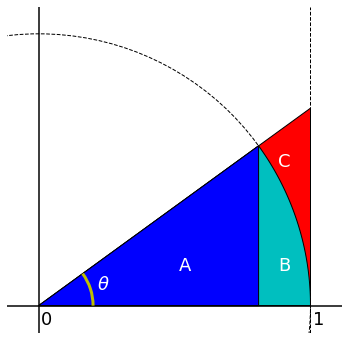

In [13]:
#@title
angle = np.pi/5
A_pos = [np.cos(angle), np.sin(angle)]

fig, ax = plt.subplots(figsize=(6, 6))

from functools import partial
ax_text = partial(ax.text, color="w", fontsize=18, zorder=4,
                  horizontalalignment='center', verticalalignment='center')

circle = plt.Circle((0, 0), 1,
                    zorder=0, facecolor='w', edgecolor='k', linestyle="--")
triangle1 = plt.Polygon([[0, 0], [1, np.tan(angle)], [1, 0]],
                        zorder=1, facecolor='r', edgecolor='k')
arc_points = np.array([[0, 0]] + [[np.cos(a), np.sin(a)] 
              for a in np.linspace(0, angle, 50)])
ax.fill(arc_points[:, 0], arc_points[:, 1],
        zorder=2, facecolor='c', edgecolor='k')
triangle2 = plt.Polygon([[0, 0], A_pos, [A_pos[0], 0]],
                        zorder=3, facecolor='b', edgecolor='k')
ax_text(2*np.cos(angle)/3, np.sin(angle)/4, "A")
ax_text((1+np.cos(angle))/2, np.sin(angle)/4, "B")
ax_text((1+np.cos(angle))/2, 0.9*np.sin(angle), "C")
ax_text(0.25*np.cos(angle/2), 0.25*np.sin(angle/2), r"$\theta$")
arc = mpl.patches.Arc([0, 0], 2*0.2, 2*0.2, theta1=0, theta2=angle*180/np.pi,
                      zorder=5, color='y', linewidth=3)
ax_text(0.03, -0.05, "0", color='k')
ax_text(1.03, -0.05, "1", color='k')

ax.axhline(y=0, color='k', zorder=4)
ax.axvline(x=0, color='k', zorder=4)
ax.axvline(x=1, color='k', zorder=4, linewidth=1, linestyle='--')
ax.axis('equal')
ax.axis([-0.1, 1.1, -0.1, 1.1])
ax.axis('off')
ax.add_artist(circle)
ax.add_artist(triangle1)
ax.add_artist(triangle2)
ax.add_patch(arc)
plt.show()

Đây là đường tròn đơn vị (bán kính = 1).

Giả sử $0 < \theta < \dfrac{\pi}{2}$, diện tích của tam giác màu xanh dương (diện tích $\mathrm{A}$) bằng chiều cao ($\sin(\theta)$), nhân với đáy ($\cos(\theta)$), rồi chia cho 2. Do đó $\mathrm{A} = \dfrac{1}{2}\sin(\theta)\cos(\theta)$.

Đường tròn đơn vị có diện tích là $\pi$, nên phần có dạng tròn (nhìn giống miếng pizza) có diện tích là A + B = $\pi\dfrac{\theta}{2\pi} = \dfrac{\theta}{2}$.

Tiếp theo, hình tam giác lớn (A + B + C) có diện tích bằng chiều cao ($\tan(\theta)$) nhân với đáy (1) chia cho 2, nên A + B + C = $\dfrac{\tan(\theta)}{2}$.

Khi $0 < \theta < \dfrac{\pi}{2}$, ta có $\mathrm{A} < \mathrm{A} + \mathrm{B} < \mathrm{A} + \mathrm{B} + \mathrm{C}$, vì vậy nên:

$\dfrac{1}{2}\sin(\theta)\cos(\theta) < \dfrac{\theta}{2} < \dfrac{\tan(\theta)}{2}$

Ta có thể nhân tất cả với 2 để loại bỏ các hệ số $\dfrac{1}{2}$. Ta cũng có thể chia cho $\sin(\theta)$, vì nó luôn dương (với giả định  $0 < \theta < \dfrac{\pi}{2}$), nên các bất đẳng thức vẫn đúng:

$cos(\theta) < \dfrac{\theta}{\sin(\theta)} < \dfrac{\tan(\theta)}{\sin(\theta)}$

Nhớ lại rằng $\tan(\theta)=\dfrac{\sin(\theta)}{\cos(\theta)}$, nên số hạng cuối cùng có thể được rút gọn như sau:

$cos(\theta) < \dfrac{\theta}{\sin(\theta)} < \dfrac{1}{\cos(\theta)}$

Vì tất cả các số hạng này đều dương khi $0 < \theta < \dfrac{\pi}{2}$, ta có thể lấy nghịch đảo của chúng và đổi dấu của các bất đẳng thức:

<hr />

**Bất đẳng thức (1)**

$\dfrac{1}{cos(\theta)} > \dfrac{\sin(\theta)}{\theta} > \cos(\theta)$

giả sử $0 < \theta < \dfrac{\pi}{2}$
<hr />

Giờ vì $\sin(-\theta)=-\sin(\theta)$, ta thấy rằng $\dfrac{\sin(-\theta)}{-\theta}=\dfrac{\sin(\theta)}{\theta}$. Hơn nữa, $\cos(-\theta)=\cos(\theta)$, và do đó $\dfrac{1}{\cos(-\theta)}=\dfrac{1}{\cos(\theta)}$. Thay các số hạng vào bất đẳng thức (1), ta có:

$\dfrac{1}{cos(-\theta)} > \dfrac{\sin(-\theta)}{-\theta} > \cos(-\theta)$

giả sử $0 < \theta < \dfrac{\pi}{2}$

Nói cách khác, bất đẳng thức (1) vẫn đúng với $-\dfrac{\pi}{2} < \theta < 0$:

<hr />

**Bất đẳng thức (2)**

$\dfrac{1}{cos(\theta)} > \dfrac{\sin(\theta)}{\theta} > \cos(\theta)$

giả sử $-\dfrac{\theta}{2} < \theta < \dfrac{\pi}{2}$ and $\theta \neq 0$
<hr />

Vì $\cos$ là một hàm liên tục, $\underset{\theta \to 0}\lim\cos(\theta)=\cos(0)=1$. Tương tự, $\underset{\theta \to 0}\lim\dfrac{1}{cos(\theta)}=\dfrac{1}{\cos(0)}=1$.

Vì bất đẳng thức (2) nói rằng $\dfrac{\sin(\theta)}{\theta}$ kẹp giữa $\dfrac{1}{cos(\theta)}$ và $\cos(\theta)$ khi $\theta$ gần bằng 0, và cả hai hàm này đều tiến tới 1 khi $\theta$ tiến tới 0, ta có thể dùng **định lý kẹp** (hay còn gọi là **định lý bánh kẹp**) để kết luận rằng $\dfrac{\sin(\theta)}{\theta}$ cũng phải tiến tới 1 khi $\theta$ tiến tới 0.

<hr />

Ta đã chứng minh được:

$\underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta}=1$

<hr />

Giờ điều thứ hai ta cần chứng minh trước khi ta có thể làm việc với đạo hàm của hàm $\sin$ là $\underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta}=0$. Ta làm vậy như sau:

$$
\begin{align*}
\underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta} & =  \underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta}\frac{\cos(\theta) + 1}{\cos(\theta) + 1} && \quad \text{ nhân và chia cho }\cos(\theta)+1\\
& =  \underset{\theta \to 0}\lim\dfrac{\cos^2(\theta) - 1}{\theta(\cos(\theta) + 1)} && \quad \text{ vì }(a-1)(a+1)=a^2-1\\
& =  \underset{\theta \to 0}\lim\dfrac{\sin^2(\theta)}{\theta(\cos(\theta) + 1)} && \quad \text{ vì }\cos^2(\theta) - 1 = \sin^2(\theta)\\
& =  \underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta}\dfrac{\sin(\theta)}{\cos(\theta) + 1} && \quad \text{ chỉ sắp xếp lại các số hạng}\\
& =  \underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta} \, \underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\cos(\theta) + 1} && \quad \text{ vì giới hạn của một tích bằng tích các giới hạn}\\
& =  \underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\cos(\theta) + 1} && \quad \text{ vì } \underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta}=1\\
& =  \dfrac{0}{1+1} && \quad \text{ vì } \underset{\theta \to 0}\lim\sin(\theta)=0 \text{ và } \underset{\theta \to 0}\lim\cos(\theta)=1\\
& =  0\\
\end{align*}
$$

<hr />

Ta đã chứng minh được:

$\underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta}=0$

<hr />

Với tất cả những điều trên, cuối cùng ta đã sẵn sàng để chứng minh đạo hàm của hàm $\sin$ là hàm $\cos$:

$$
\begin{align*}
f'(x) & = \underset{\theta \to 0}\lim\dfrac{f(x+\theta) - f(x)}{\theta} && \quad\text{theo định nghĩa}\\
& = \underset{\theta \to 0}\lim\dfrac{\sin(x+\theta) - \sin(x)}{\theta} && \quad \text{sử dụng }f(x) = \sin(x)\\
& = \underset{\theta \to 0}\lim\dfrac{\cos(x)\sin(\theta) + \sin(x)\cos(\theta) - \sin(x)}{\theta} && \quad \text{vì } cos(a+b)=\cos(a)\sin(b)+\sin(a)\cos(b)\\
& = \underset{\theta \to 0}\lim\dfrac{\cos(x)\sin(\theta)}{\theta} + \underset{\theta \to 0}\lim\dfrac{\sin(x)\cos(\theta) - \sin(x)}{\theta} && \quad \text{vì giới hạn của một tổng bằng tổng các giới hạn}\\
& = \cos(x)\underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta} + \sin(x)\underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta} && \quad \text{rút } \cos(x) \text{ và } \sin(x) \text{ ra ngoài vì chúng không phụ thuộc vào }\theta\\
& = \cos(x)\underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta} && \quad \text{vì }\underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta}=0\\
& = \cos(x) && \quad \text{vì }\underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta}=1\\
\end{align*}
$$


## Cô-sin: $f(x)=\cos(x)$

Vì ta đã chứng minh được $\sin'(x)=\cos(x)$, việc chứng minh $\cos'(x)=-\sin(x)$ trở nên dễ hơn rất nhiều.

$$
\begin{align*}
f'(x) & = \underset{\theta \to 0}\lim\dfrac{f(x+\theta) - f(x)}{\theta} && \quad\text{theo định nghĩa}\\
& = \underset{\theta \to 0}\lim\dfrac{\cos(x+\theta) - \cos(x)}{\theta} && \quad \text{sử dụng }f(x) = \cos(x)\\
& = \underset{\theta \to 0}\lim\dfrac{\sin\left(x+\dfrac{\pi}{2}+\theta\right) - \sin\left(x+\dfrac{\pi}{2}\right)}{\theta} && \quad \text{vì }\cos(x) = \sin\left(x+\dfrac{\pi}{2}\right)\\
& = \underset{\theta \to 0}\lim\dfrac{\sin(z+\theta) - \sin(z)}{\theta} && \quad \text{sử dụng }z = x + \dfrac{\pi}{2}\\
& = \sin'(z) && \quad \text{sử dụng định nghĩa của }\sin'(z)\\
& = \cos(z) && \quad \text{vì ta đã chứng minh rằng }\sin'(z)=\cos(z)\\
& = \cos\left(x + \dfrac{\pi}{2}\right) && \quad \text{sử dụng định nghĩa của }z\\
& = -\sin(x) && \quad \text{sử dụng quy tắc phổ biến này trong lượng giác}
\end{align*}
$$


## Tan: $f(x) = \tan(x)$

Vì $\tan(x)=\dfrac{\sin(x)}{\cos(x)}$, ta có thể dùng quy tắc thương để có được:

$f'(x) = \dfrac{\sin'(x)\cos(x) - \sin(x)\cos'(x)}{\cos^2(x)}$

Vì $\sin'(x)=\cos(x)$ và $\cos'(x)=-\sin(x)$, ta có:

$f'(x) = \dfrac{\cos^2(x) + \sin^2(x)}{\cos^2(x)}$

Và cuối cùng, vì $\cos^2(x) + \sin^2(x) = 1$, ta có:

$f'(x) = \dfrac{1}{\cos^2(x)}$
